# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price

btc_url = btc_url + "?format=json"
request_data = requests.get(btc_url).json()

my_btc_value = request_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price

eth_url = eth_url + "?format=json"
request_data = requests.get(eth_url).json()

my_eth_value = request_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_value = my_btc * my_btc_value
eth_value = my_eth * my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} each")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} each")

The current value of your 1.2 BTC is $23957.00 each
The current value of your 5.3 ETH is $1888.35 each


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-8-11",tz="US/Central").isoformat()
start = pd.Timestamp("2021-8-11",tz="US/Central").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = api.get_bars(tickers, timeframe, start=start, end=today).df

df_portfolio.index = df_portfolio.index.date

# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

df_agg_spy = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
df_agg_spy.head()

SPY                                                  \
              open      high     low   close    volume trade_count   
2021-08-12  443.59  445.2572  442.66  445.11  38915418      260951   
2021-08-13  445.55  445.9400  445.07  445.92  39373657      233546   
2021-08-16  444.60  447.1100  442.87  446.97  73751261      406486   
2021-08-17  444.28  444.9600  440.85  444.04  92452576      592797   
2021-08-18  442.93  444.6250  438.92  439.18  89016658      508238   

                           AGG                                       \
                  vwap    open      high       low   close   volume   
2021-08-12  444.185067  115.49  115.5799  115.4000  115.55  5002671   
2021-08-13  445.543935  115.65  115.9700  115.6401  115.97  4599811   
2021-08-16  445.277494  116.14  116.2700  116.0300  116.03  3693575   
2021-08-17  443.563793  115.98  116.0900  115.9300  115.94  5468245   
2021-08-18  441.793776  115.94  116.0300  115.8000  115.95  3981800   

                                    
           trade_count        vwap  
2021-08-12       16389  115.504294  
2021-08-13       14195  115.855121  
2021-08-16       14142  116.129334  
2021-08-17       13678  115.986929  
2021-08-18       13820  115.910223

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_agg_spy["AGG"]["close"][0])
spy_close_price = float(df_agg_spy["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.55
Current SPY closing price: $445.11


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22255.50
The current value of your 200 AGG shares is $23110.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_portfolio = eth_value = btc_value
stock_portfolio = my_agg_value + my_spy_value

assets_data = {"Total in Dollars":[crypto_portfolio,stock_portfolio]}


# Create savings DataFrame
df_savings = pd.DataFrame(assets_data, index=["Crypto","Stocks"])

# Display savings DataFrame
display(df_savings)

,Total in Dollars
Crypto,28748.4
Stocks,45365.5


<AxesSubplot:title={'center':'Pie Chart of Savings'}, ylabel='Total in Dollars'>

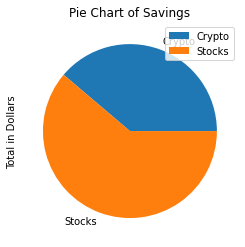

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = "Total in Dollars", title="Pie Chart of Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_portfolio + stock_portfolio

# Validate saving health
if total_savings > emergency_fund:
    print("You are above the goal amount for your emergency fund.")

elif total_savings == emergency_fund:
    print("You are equal to your goal for emergency fund amount.")

else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching your emergency fund goal.")

You are above the goal amount for your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data_5 = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data_5.index = df_stock_data_5.index.date

# Reorganize the DataFrame
# Separate ticker data
AGG_5 = df_stock_data_5[df_stock_data_5['symbol']=='AGG'].drop('symbol', axis=1)
SPY_5 = df_stock_data_5[df_stock_data_5['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_agg_spy_5 = pd.concat([AGG_5, SPY_5], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_agg_spy_5.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30yr = MCSimulation(portfolio_data = df_agg_spy_5, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)


In [17]:
# Printing the simulation input data

MC_30yr.portfolio_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-02  110.627199          NaN  206.90  208.18  206.41  208.03   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-02   61908515      263580  207.294812          NaN  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Bebop\desktop\fintech\Mod5_Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993808,1.007942,0.992664,0.996486,1.000129,1.000793,1.003301,0.999648,0.997582,0.998511,...,0.995215,1.005256,1.010161,0.995439,1.004452,1.001613,0.997420,0.991983,1.010695,0.991840
2,0.983223,1.001363,0.992280,0.985016,0.998735,0.998818,1.002896,0.992757,0.990199,0.998179,...,0.991553,0.992867,1.016627,0.998384,1.010966,1.004197,1.007735,0.987456,1.010391,0.988114
3,0.983110,1.014007,0.997616,0.975667,0.999964,1.004929,0.988679,0.983330,0.985829,0.998498,...,0.994877,1.005701,1.012191,0.999997,1.020764,1.005854,1.013711,0.991036,1.022341,0.996174
4,0.981141,1.014252,1.003523,0.968444,1.008670,1.003589,0.990264,0.976810,0.987414,0.999003,...,0.993301,1.009743,1.020067,1.010361,1.025663,1.003761,1.016735,0.992373,1.031125,1.003405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.620558,9.284556,6.725106,11.070271,9.570685,19.095892,8.689727,24.233492,6.164899,20.187620,...,20.414899,8.100318,11.090298,9.805306,25.193127,12.778384,46.633030,21.744637,4.259047,15.316860
7557,25.742371,9.247202,6.679240,10.975974,9.499065,19.164360,8.658595,23.995289,6.172623,20.167314,...,20.434965,8.066496,11.062312,9.801453,25.412059,12.908727,47.023196,21.654836,4.273881,15.454392
7558,25.621935,9.300200,6.568415,10.964589,9.508207,19.199119,8.604455,24.039317,6.173043,20.213606,...,20.533185,8.109082,10.996893,9.984838,25.239368,13.072997,47.908929,21.674841,4.298667,15.297886
7559,25.821890,9.372940,6.486350,10.986337,9.413572,19.297777,8.697944,24.228665,6.237787,20.134736,...,20.400671,8.051736,11.005086,9.975233,25.002978,13.139678,47.760355,21.556078,4.300231,15.143292


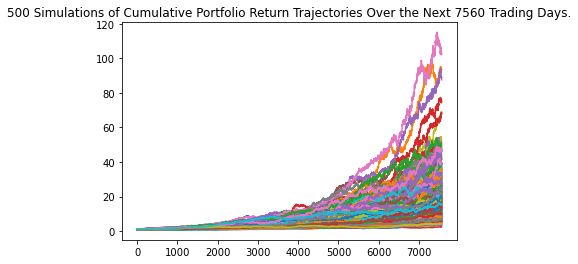

In [19]:
# Plot simulation outcomes

line__sim_plot = MC_30yr.plot_simulation()


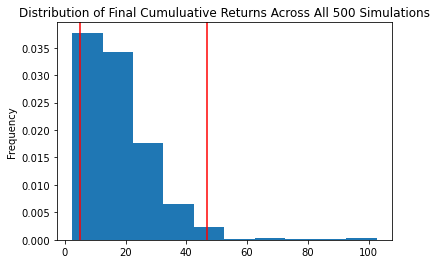

In [20]:
# Plot probability distribution and confidence intervals

dist_plot = MC_30yr.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cum_ret_table = MC_30yr.summarize_cumulative_return()

# Print summary statistics
print(sum_cum_ret_table)

count           500.000000
mean             18.392091
std              12.279904
min               2.428602
25%              10.119858
50%              15.337318
75%              23.695732
max             102.624586
95% CI Lower      4.863605
95% CI Upper     46.861515
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(sum_cum_ret_table[8]*initial_investment,2)
ci_upper = round(sum_cum_ret_table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97272.1 and $937230.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_inc = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_cum_ret_table[8]*initial_investment_inc,2)
ci_upper = round(sum_cum_ret_table[9]*initial_investment_inc,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_inc} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $145908.15 and $1405845.44


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5yr = MCSimulation(portfolio_data = df_agg_spy_5, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)


In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Bebop\desktop\fintech\Mod5_Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001706,1.000881,0.998590,0.991515,1.000026,1.009863,1.011774,0.998200,0.989612,1.000816,...,0.993173,0.989883,1.008579,1.003626,1.006850,1.001597,1.000969,1.000093,1.007939,1.009087
2,1.011436,1.005278,1.005107,0.973484,0.998107,1.028635,0.994224,0.984388,0.992732,1.008424,...,0.985248,0.994512,1.010702,0.991806,1.007701,1.010250,1.003436,0.999723,1.012309,0.996536
3,1.010401,1.004295,0.993902,0.961537,1.000028,1.027804,0.997420,0.978880,1.023265,1.008418,...,0.982063,0.995412,1.013423,1.000876,1.005469,1.019959,1.009383,0.996705,1.000878,0.987122
4,1.008907,1.012263,0.988747,0.953747,1.000872,1.040918,1.007603,0.981276,1.028191,0.997801,...,0.973486,0.982716,1.011004,0.993785,1.001333,1.014862,0.999550,0.986936,1.006699,0.984227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.594030,1.650038,2.465564,1.375788,2.002794,1.643971,1.558375,1.668723,0.904277,1.660743,...,1.722509,1.308191,2.375804,1.558805,1.145871,1.621633,1.433144,2.586816,1.599926,1.770818
1257,2.606272,1.688275,2.496062,1.380917,1.989679,1.651026,1.549351,1.660394,0.897739,1.654318,...,1.720666,1.312463,2.374305,1.547886,1.148381,1.640350,1.445789,2.569427,1.598821,1.764869
1258,2.631609,1.691610,2.486953,1.381693,1.985091,1.664676,1.561013,1.649045,0.895984,1.648327,...,1.705640,1.301600,2.378789,1.547121,1.144067,1.644891,1.438993,2.553662,1.601539,1.787806
1259,2.666312,1.681034,2.507998,1.378224,1.992208,1.652322,1.574608,1.628125,0.890651,1.638188,...,1.711813,1.288771,2.386603,1.552229,1.156106,1.629821,1.440588,2.566262,1.603762,1.802235


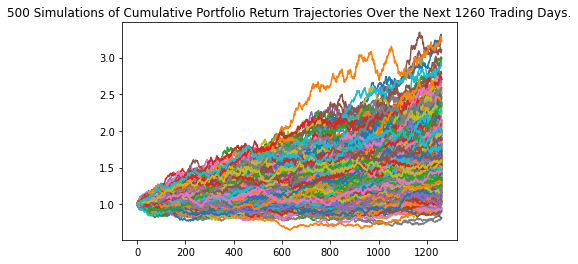

In [26]:
# Plot simulation outcomes

line__sim_plot_5 = MC_5yr.plot_simulation()


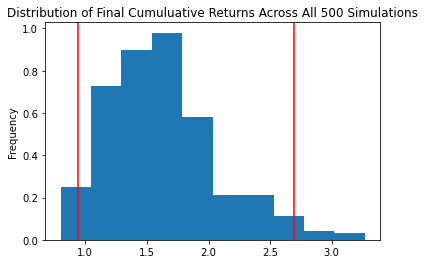

In [27]:
# Plot probability distribution and confidence intervals

dist_plot_5 = MC_5yr.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_cum_ret_table_5 = MC_5yr.summarize_cumulative_return()

# Print summary statistics
print(sum_cum_ret_table_5)

count           500.000000
mean              1.628118
std               0.445328
min               0.798762
25%               1.308308
50%               1.567004
75%               1.872169
max               3.268890
95% CI Lower      0.938164
95% CI Upper      2.697030
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_five = round(sum_cum_ret_table_5[8]*initial_investment_5,2)
ci_upper_five = round(sum_cum_ret_table_5[9]*initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56289.86 and $161821.8


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_10yr = MCSimulation(portfolio_data = df_agg_spy_5, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)


In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_10yr.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Bebop\desktop\fintech\Mod5_Challenge\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004003,0.995968,0.999564,1.003960,1.007607,0.991545,0.997270,1.010265,0.990441,0.995686,...,0.994294,0.999156,0.993269,1.009098,1.008021,0.990355,0.993354,0.996294,1.002180,0.991163
2,1.009660,0.993992,1.005892,1.005887,1.005059,1.001653,1.009830,1.015671,0.983488,1.001956,...,0.995656,1.006792,0.984639,0.997942,1.010814,0.998508,0.980606,1.001438,0.992704,0.994590
3,1.007771,0.984776,1.006091,0.998858,1.010485,1.004986,1.018231,1.006304,0.988288,1.004295,...,0.987464,1.012558,0.990786,0.992730,1.002005,0.997098,0.982446,1.002772,0.983391,1.002312
4,1.005124,0.979903,1.013377,1.009530,1.011585,1.011873,1.003028,0.994903,0.984154,1.005344,...,0.971535,1.004620,0.999300,0.985994,0.990558,0.994628,0.989123,0.994325,0.979445,1.001108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.114141,2.963345,4.821019,2.177713,1.578600,2.157006,2.748728,1.650318,2.268993,2.151138,...,1.544029,1.878840,1.784272,3.176847,1.979126,2.007004,4.124025,3.230100,2.464058,3.068762
2517,3.126898,2.954960,4.830046,2.169853,1.579379,2.156886,2.763983,1.641604,2.274821,2.178385,...,1.538706,1.883542,1.793355,3.161458,1.979379,2.018722,4.080542,3.247965,2.444888,3.032776
2518,3.177377,2.960971,4.889176,2.164355,1.577576,2.177041,2.771793,1.641533,2.274524,2.155986,...,1.549193,1.891405,1.789670,3.186627,1.982983,2.019082,4.131246,3.258607,2.437056,3.011455
2519,3.190228,2.923684,4.788190,2.164405,1.575326,2.221255,2.788799,1.648183,2.283847,2.145621,...,1.548679,1.876725,1.783718,3.197665,1.977707,2.021459,4.093189,3.241867,2.442987,3.032811


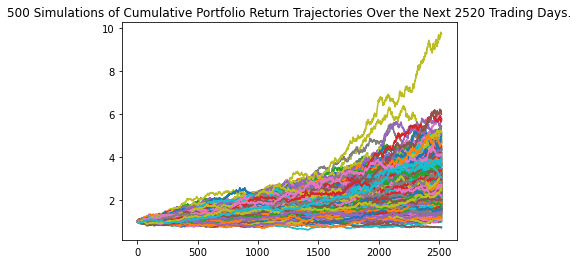

In [32]:
# Plot simulation outcomes

line_sim_plot_10 = MC_10yr.plot_simulation()


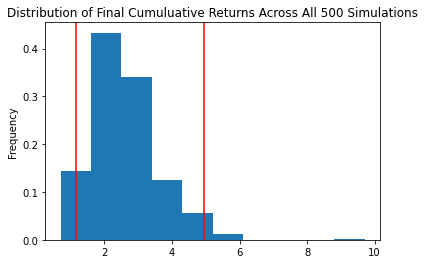

In [33]:
# Plot probability distribution and confidence intervals

dist_plot_10 = MC_10yr.plot_distribution()


In [34]:
# Fetch summary statistics from the Monte Carlo simulation results

sum_cum_ret_table_10 = MC_10yr.summarize_cumulative_return()


# Print summary statistics

print(sum_cum_ret_table_10)


count           500.000000
mean              2.611212
std               0.985558
min               0.703494
25%               1.933123
50%               2.454390
75%               3.126529
max               9.709817
95% CI Lower      1.167794
95% CI Upper      4.962039
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000

ci_lower_ten = round(sum_cum_ret_table_10[8]*initial_investment_10,2)
ci_upper_ten = round(sum_cum_ret_table_10[9]*initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70067.65 and $297722.33
